<font color = '#FFA500' size = '8%'>
  <center>The Pythonizers - Term Project</center>
  <center><font size = '6%'><b><u>COVID Analysis</u></b></font></center>
</font>

In [1]:
!pip install varname

In [2]:
# Importing Required Libraries.
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from varname import nameof

<font color = '#FFA500' size = '6%'>User-Defined Functions - A Helping Hand</font>

In [3]:
#region Outliers

def find_outliers(data_frame, columns = None) -> np.ndarray:
  '''
  Find the indices of outliers in a given DataFrame using the interquartile range (IQR) method.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - columns (list or None): A list of column names to consider for outlier detection.
    If None, all numerical columns in the DataFrame will be considered.
  ---
  # Returns:
  - outliers_indices (numpy.ndarray): An array containing the indices of the outliers.
  '''

  # Parameter Validator.
  if columns is None:
    columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()

  outliers_indices = np.array([], dtype=int)

  for column in columns:
    # Convert column to numpy array for consistent handling.
    data = data_frame[column].values

    # Calculate the first quartile (Q1) and third quartile (Q3).
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR).
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers.
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the indices of outliers for the current column.
    column_outliers_indices = np.where((data < lower_bound) | (data > upper_bound))[0]

    # Concatenate indices to the overall outliers_indices array.
    outliers_indices = np.concatenate((outliers_indices, column_outliers_indices))

  # Remove duplicate indices and return.
  return np.unique(outliers_indices)

def remove_outliers_iqr(data_frame, columns = None) -> pd.DataFrame:
  '''
  Remove outliers from a given DataFrame using the interquartile range (IQR) method.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - columns (list or None): A list of column names to consider for outlier removal.
    If None, all numerical columns in the DataFrame will be considered.
  ---
  # Returns:
  - data_frame_without_outliers (pandas.DataFrame): The DataFrame with outliers removed.
  '''

  # Parameter validator.
  if columns is None:
    columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()

  # Copying it to prevent the original DataFrame being altered.
  data_frame_without_outliers = data_frame.copy()

  for column in columns:
    # Find the indices of outliers for the current column.
    outliers_indices = find_outliers(data_frame, columns=[column])

    # Remove outliers from the current column.
    data_frame_without_outliers[column].iloc[outliers_indices] = np.nan

  # Drop rows with NaN values after removing outliers.
  data_frame_without_outliers = data_frame_without_outliers.dropna()

  return data_frame_without_outliers

def remove_outliers_median_imputation(data_frame, columns = None) -> pd.DataFrame:
  '''
  Remove outliers from a given DataFrame using median imputation.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - columns (list or None): A list of column names to consider for outlier removal.
    If None, all numerical columns in the DataFrame will be considered.
  ---
  # Returns:
  - data_frame_without_outliers (pandas.DataFrame): The DataFrame with outliers removed using median imputation.
  '''

  # Parameter Validator.
  if columns is None:
      columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()

  # Copying it to prevent the original DataFrame being altered.
  data_frame_without_outliers = data_frame.copy()

  for column in columns:
      # Find the indices of outliers for the current column
      outliers_indices = find_outliers(data_frame, columns=[column])

      # Impute outliers with the median of the column
      median_value = data_frame[column].median()
      data_frame_without_outliers[column].iloc[outliers_indices] = median_value

  return data_frame_without_outliers

def remove_outliers(data_frame, strategy = 'median_imputation', columns = None) -> pd.DataFrame:
  '''
  Remove outliers from a given DataFrame based on the specified strategy.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - strategy (str): The strategy to use for outlier removal. Options: 'iqr' or 'median_imputation'.
  - columns (list or None): A list of column names to consider for outlier removal.
    If None, all numerical columns in the DataFrame will be considered.
  ---
  # Returns:
  - data_frame_without_outliers (pandas.DataFrame): The DataFrame with outliers removed based on the specified strategy.
  '''

  # Parameter Validator.
  if strategy not in ['iqr', 'median_imputation']:
      raise ValueError("Invalid strategy. Choose either 'iqr' or 'median_imputation'.")

  # Switching based on the different outlier removal methods.
  if strategy == 'iqr':
      return remove_outliers_iqr(data_frame, columns)
  elif strategy == 'median_imputation':
      return remove_outliers_median_imputation(data_frame, columns)

def plot_outlier_boxplots(data_frame, columns = None) -> None:
  '''
  Plot boxplots for specified columns in a DataFrame, highlighting outliers.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - columns (list or None): A list of column names to plot boxplots.
    If None, boxplots will be plotted for all numerical columns.
  ---
  # Returns:
  - None: Plots the scatter plot with the parameters provided.
  '''

  # Parameter Validator.
  if columns is None:
    columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()

  # Removing the unnecessary columns.
  # unnecessary_columns = []
  # for column in data_frame:
  #   if data_frame[column].dtype == 'object' or data_frame[column].dtype == 'str':
  #     unnecessary_columns.append(column)
  # data_frame.drop(unnecessary_columns, axis = 1, inplace = True)

  # Setting the Figure Size.
  plt.figure(figsize=(15, data_frame.shape[1] * 3))

  for i, column in enumerate(columns, start = 1):
    plt.subplot(len(columns), 1, i)
    sns.boxplot(x = data_frame[column],
                color = '#FFA500')
    plt.title = f'Outliers of { column }'

  # Highlight outliers with red markers.
  outliers_indices = find_outliers(data_frame, columns = [column])
  outliers = data_frame[column].iloc[outliers_indices]

  # Plotting the scatter plot.
  plt.scatter(outliers_indices, outliers, color = 'red', marker = 'o', label = 'Outliers')

  plt.legend()

  # Plotting the plot.
  plt.tight_layout()
  plt.show()

#endregion

#region Missing Values

def get_missing_values(data_frame) -> pd.Series:
  '''
  Gets the missing values in the provided DataFrame.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  ---
  # Returns:
  - data_frame (pandas.Series): The Series of sum of null values.
  '''

  return data_frame.isna().sum()

def fill_missing_values(data_frame, approach = 'ffill') -> pd.DataFrame:
  '''
  Fill missing values in a given DataFrame using forward fill.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): The input DataFrame.
  - approach (str): Method as used in fillna() method (or interpolate) for filling the NaN values.
  ---
  # Returns:
  - filled_data_frame (pandas.DataFrame): The DataFrame with missing values filled using forward fill.
  '''

  filled_data_frame = data_frame.copy()

  if approach == 'interpolate':
    filled_data_frame.interpolate(method = 'time', inplace = True)
  else:
    filled_data_frame.fillna(method = approach, inplace = True)

  return filled_data_frame

#endregion

#region Plots

def plot_charts(x_data, y_data, x_label, y_label, pie_labels, title, figsize = (15, 6)) -> None:
  '''
  Plots pie and bar charts using subplots.
  ---
  # Parameters:
  - x_data (list or array-like): X-axis data.
  - y_data (list or array-like): Y-axis data.
  - x_label (str): Label for x-axis.
  - x_label (str): Label for y-axis.
  - pie_labels (list or array-like): Labels for pie chart.
  - title (str): Title of the combined chart.
  - figsize (tuple): Figure size in inches. Default is (12, 6).
  ---
  # Returns:
  - None: Plots the charts using the parameters provided.
  ---
  # Example:
  >>> x_data = [1, 2, 3, 4, 5]
  >>> y_data = [10, 20, 15, 25, 30]
  >>> pie_labels = ['A', 'B', 'C', 'D', 'E']
  >>> x_label = 'X-axis Label'
  >>> y_label = 'Y-axis Label'
  >>> title = 'Custom Chart'
  >>> plot_pie_and_bar_subplots(x_data, y_data, pie_labels, x_label, y_label, title)
  '''

  # Setting figure size before plotting the charts.
  plt.figure(figsize = figsize)

  # Subplot for the first column - pie chart.
  plt.subplot(1, 2, 1)

  # Pie Chart.
  plt.pie(x = y_data,
          labels = pie_labels,
          autopct = '%.2f%%',
          shadow = True,
          explode = (([0.1]) + ([0] * (len(x_data) - 1))),
          wedgeprops = dict(width = 0.6),
          startangle = 90)

  # Chart Decoration for Pie Chart.
  plt.xlabel(x_label)
  plt.title = title

  # Subplot for the second plot - bar chart.
  plt.subplot(1, 2, 2)

  # Bar Chart.
  plt.bar(x = x_data,
          height = y_data)

  # Display actual values on top of the bars
  for i, value in enumerate(y_data):
    plt.text(i, value + 1, str(int(value)), ha = 'center', va = 'bottom')

  # Chart Decoration for Bar Chart.
  plt.xticks(rotation = 90)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title = title

  # Adjust layout to prevent overlap.
  plt.tight_layout()

  # Display the subplots.
  plt.show()

def create_pie_subplot(ax, labels, sizes, title) -> None:
  '''
  Create a pie chart subplot on the given axis.
  ---
  # Parameters:
  - ax (matplotlib.axes._subplots.AxesSubplot): The axis on which to create the pie chart.
  - labels (list): A list of labels for each wedge in the pie chart.
  - sizes (list): A list of sizes (values) for each wedge in the pie chart.
  - title (str): The title of the pie chart subplot.
  ---
  # Returns:
  - None: Sets the pie chart and decorates it for the `ax` provided.
  '''

  ax.pie(sizes,
         labels = labels,
         autopct = '%.2f%%',
         startangle = 90,
         colors = colors,
         explode = [0.1] * len(labels))

  ax.axis('equal')

  # Setting the title as passed in the argument.
  ax.set_title(title)

def plot_time_series(data_frame, field, figsize = (8, 4), y_label = '', title = '') -> None:
  '''
  Plots a time series chart for the given parameters.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): Data container holding values to manipulate.
  - field (str): Name of the column to deal with.
  - figsize (tuple): Size of the figure to be plotted.
    It must be providing x and y as integers, having a shape of 2.
  - y_label (str): Label for the y axis as the x axis is going to be fixed.
  - title (str): Title of the plot.
  ---
  # Returns:
  - None: Plots the chart using `plt` object.
  '''
  data_frame[field].plot(kind = 'line',
                         figsize = figsize,
                         ylabel = y_label,
                         title = title)

  # Removes the lines over x and y axis.
  plt.gca().spines[['top', 'right']].set_visible(False)

  # Plots the chart.
  plt.show()

#endregion

#region DataFrame Manipulation

def top_records_sorted(data_frame, field, max = 10) -> pd.DataFrame:
  '''
  Sorts the records and provides the top 10 records of that.
  ---
  # Parameters:
  - data_frame (pandas.DataFrame): Data container holding values to manipulate.
  - field (str): Name of the column to deal with.
  - max (int): The 'Top-10' can be adjusted here. Default: 10.
  ---
  # Returns
  - data_frame (pandas.DataFrame): Sorted and filtered data.
  ---
  # Example
  >>> top_records_sorted(data_frame = df, field = 'State', max = 5)
  '''

  return data_frame[field].max().reset_index().sort_values(by = field, ascending = False).iloc[ : max]

#endregion

<center><font color = '#FFA500' size = '8%'>Exploratory Data Analysis (EDA)</font></center>

<font color = '#FFA500' size = '6%'>Exploring the Dataset & Data Cleansing</font>

In [4]:
df = pd.read_csv('StatewiseTestingDetails.csv')

In [5]:
# First look on the dataset.
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


from matplotlib import pyplot as plt
_df_0['TotalSamples'].plot(kind='hist', bins=20, title='TotalSamples')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Negative'].plot(kind='hist', bins=20, title='Negative')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Positive'].plot(kind='hist', bins=20, title='Positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='TotalSamples', y='Negative', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Negative', y='Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['TotalSamples'].plot(kind='line', figsize=(8, 4), title='TotalSamples')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Negative'].plot(kind='line', figsize=(8, 4), title='Negative')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Positive'].plot(kind='line', figsize=(8, 4), title='Positive')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Understanding the structure of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [7]:
# Looking on the statistical values of the data.
df.describe()

,TotalSamples,Positive
count,1.633600e+04,5.662000e+03
mean,5.376466e+06,5.652654e+04
std,8.780338e+06,1.673108e+05
min,5.800000e+01,0.000000e+00
25%,1.729098e+05,5.362500e+02
50%,9.307580e+05,4.771000e+03
75%,7.284795e+06,3.361875e+04
max,6.789786e+07,1.638961e+06


In [8]:
# Finding the Number of Unique Values in the Data for differentiating between Continuous and Categorical Variables.
df.nunique()

Date              497
State              36
TotalSamples    16182
Negative         6898
Positive         4328
dtype: int64

<font color = '#FFA500' size = '4%'>Type Conversion</font>

In [9]:
# Converting Date from string to datetime instance.
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16336 non-null  datetime64[ns]
 1   State         16336 non-null  object        
 2   TotalSamples  16336 non-null  float64       
 3   Negative      6969 non-null   object        
 4   Positive      5662 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 638.2+ KB


<font color = '#FFA500'>Converting `Negative` Feature from Object to Integer.</font>

In [10]:
df.Negative

0        1210
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
16331     NaN
16332     NaN
16333     NaN
16334     NaN
16335     NaN
Name: Negative, Length: 16336, dtype: object

In [11]:
df.Negative = pd.to_numeric(df.Negative, errors = 'coerce')
df.Negative = df.Negative.astype(int, errors = 'ignore')
# df.Negative = df.Negative.astype('Int64')
df.Negative

0        1210.0
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
16331       NaN
16332       NaN
16333       NaN
16334       NaN
16335       NaN
Name: Negative, Length: 16336, dtype: float64

<font color = '#FFA500' size = '6%'>Types of Variables

Continuous Variables:
<ul>
  <li>Date</li>
  <li>TotalSamples</li>
  <li>Negative</li>
  <li>Positive</li>
</ul>

Categorical Variables:
<ul>
  <li>State</li>
</ul>
</font>

In [12]:
continuous_variables = list(df.drop(['State'], axis = 1).columns)
categorical_variables = ['State']

print(f'Continuous Variables: { continuous_variables }')
print(f'Categorical Variables: { categorical_variables }')

Continuous Variables: ['Date', 'TotalSamples', 'Negative', 'Positive']
Categorical Variables: ['State']


In [13]:
# Looking for the unique values.
df.apply(pd.unique)

Date            [2020-04-17T00:00:00.000000000, 2020-04-24T00:...
State           [Andaman and Nicobar Islands, Andhra Pradesh, ...
TotalSamples    [1403.0, 2679.0, 2848.0, 3754.0, 6677.0, 6965....
Negative        [1210.0, nan, 1175.0, 6009.0, 6577.0, 6553.0, ...
Positive        [12.0, 27.0, 33.0, 35.0, 38.0, 41.0, 44.0, 45....
dtype: object

<center><font color = '#FFA500' size = '6%'>Missing Values</font></center>

<font color = '#FFA500' size = '4%'>Setting Index as Date</font>

In [14]:
# Changing the index to Date.
df.set_index('Date', inplace = True)
df

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...
2021-08-06,West Bengal,15999961.0,NaN,NaN
2021-08-07,West Bengal,16045662.0,NaN,NaN
2021-08-08,West Bengal,16092192.0,NaN,NaN


In [15]:
# Calculationg sum (sigma) of missing values.
get_missing_values(df)

State               0
TotalSamples        0
Negative         9368
Positive        10674
dtype: int64

In [16]:
# Filling the missing values in the dataframe using interpolating values.
df = fill_missing_values(df, approach = 'interpolate')

# Reevaluating the missing value count.
get_missing_values(df)

State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [17]:
# Resetting the index back as it was by default.
df.reset_index(inplace = True)

<center><font color = '#FFA500' size = '6%'>Outliers</font></center>

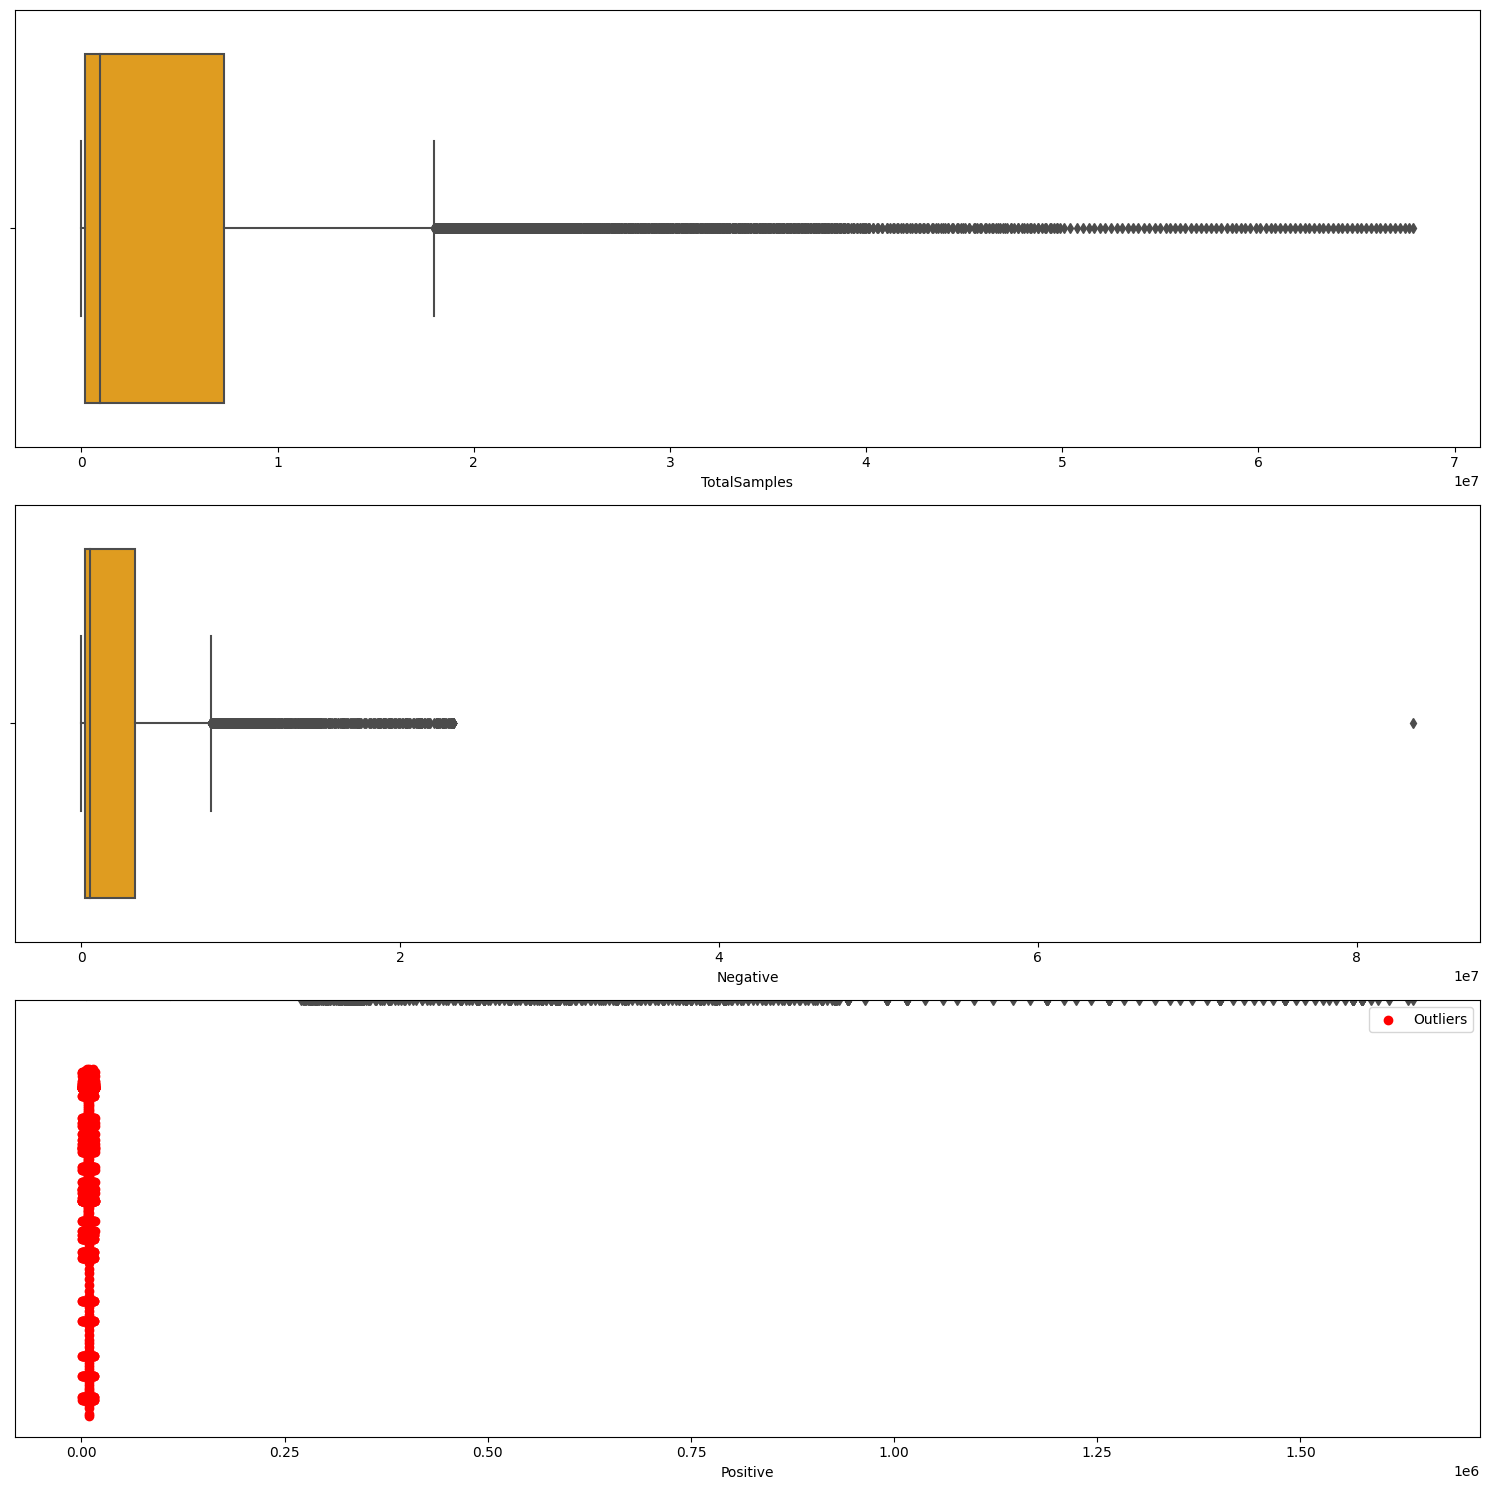

In [18]:
# Finding the outliers by plotting boxplots.
plot_outlier_boxplots(df)

<font color = '#FFA500'>As per our dataset, we can understand that outliers might not be providing any significant impact for the fields `TotalSamples` and `Positive`. The main reason would be the nature of the data and assuming the data is collected through a legit source having no randomness in the missing values. With that point in consideration, we shall proceed further to perform some analysis and apply modeling.</font>

<center><font color = '#FFA500' size = '6%'>Data Analysis</font></center>

<font color = '#FFA500'>What is the trend over the period of time of the Total Samples?</font>

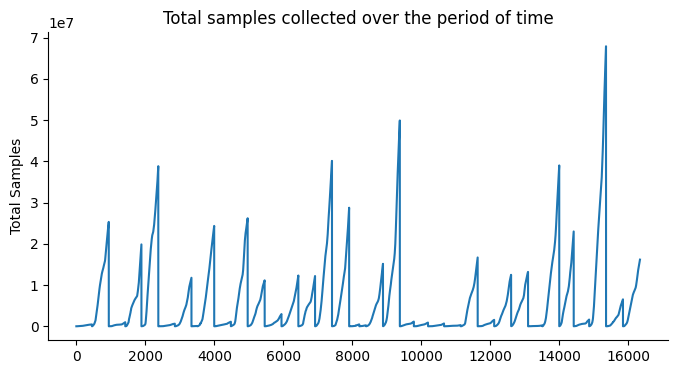

In [19]:
# time series plot for the Total Samples in our dataset.
plot_time_series(data_frame = df,
                 field = nameof(df.TotalSamples),
                 y_label = 'Total Samples',
                 title = 'Total samples collected over the period of time')

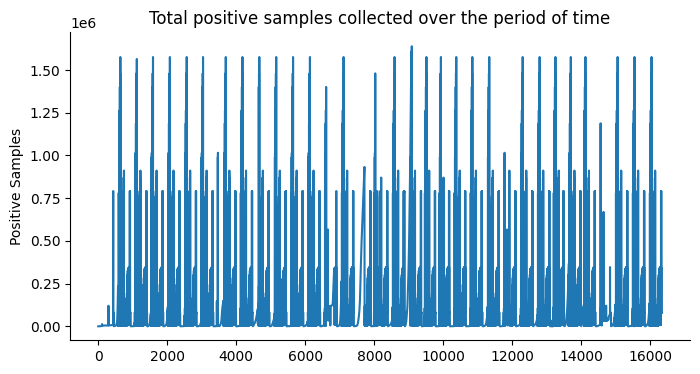

In [20]:
#time series plot for the Positive Samples.
plot_time_series(data_frame = df,
                 field = nameof(df.Positive),
                 y_label = 'Positive Samples',
                 title = 'Total positive samples collected over the period of time')

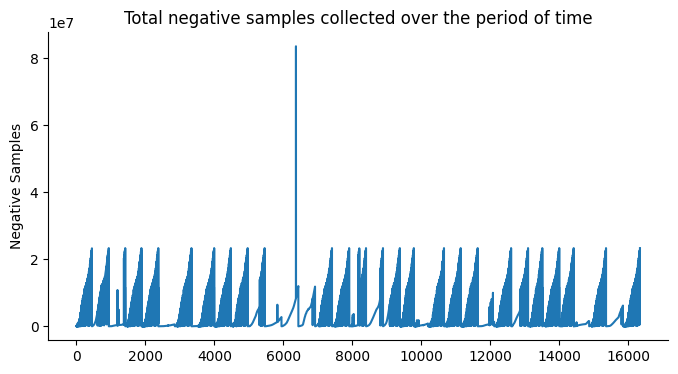

In [21]:
#time series plot for the Negative Samples.
plot_time_series(data_frame = df,
                 field = nameof(df.Negative),
                 y_label = 'Negative Samples',
                 title = 'Total negative samples collected over the period of time')

<font color = '#FFA500'>How many positive and negative cases do we have?</font>

In [22]:
# Grouping data State-wise.
df_group = df.groupby('State')

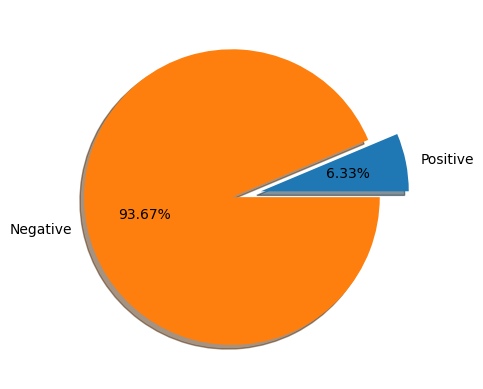

In [23]:
# Cooking data for the chart.
data = top_records_sorted(data_frame = df_group,
                          field = nameof(df_group.Positive)) \
       .merge(top_records_sorted(data_frame = df_group,
                                 field = nameof(df_group.Negative)))

plt.pie(x = [data.Positive.max(),
             data.Negative.max()],
        explode = [0.1,
                   0.1],
        shadow = True,
        labels = ['Positive',
                  'Negative'],
        autopct = '%.2f%%')

# Chart Decoration.
plt.title = 'Positive and Negative Cases'

plt.show()

<font color = '#FFA500'>Which states contributes the most in haivng positive cases?</font>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16336 non-null  datetime64[ns]
 1   State         16336 non-null  object        
 2   TotalSamples  16336 non-null  float64       
 3   Negative      16336 non-null  float64       
 4   Positive      16336 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 638.2+ KB


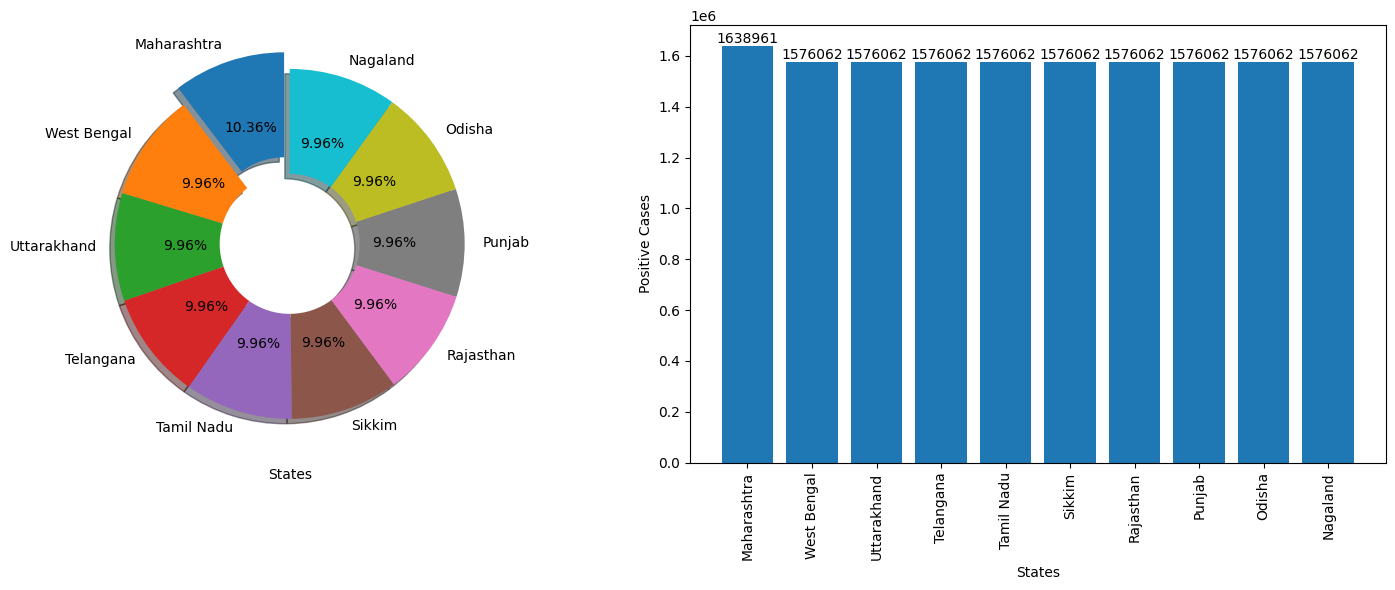

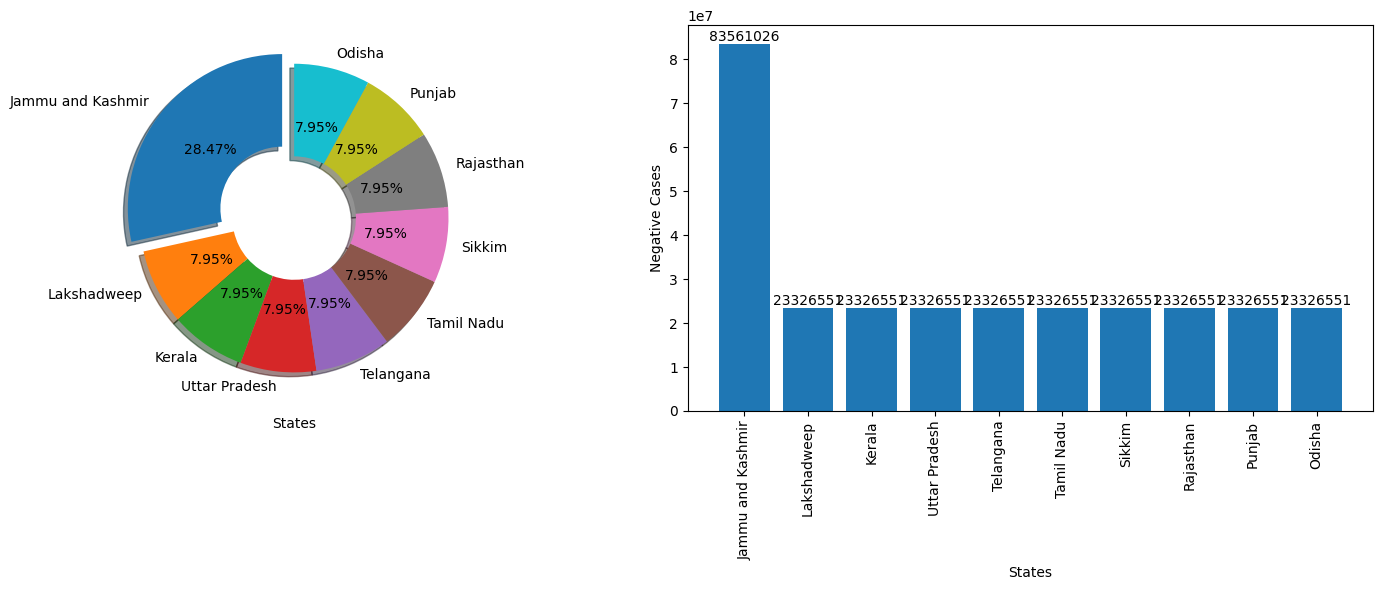

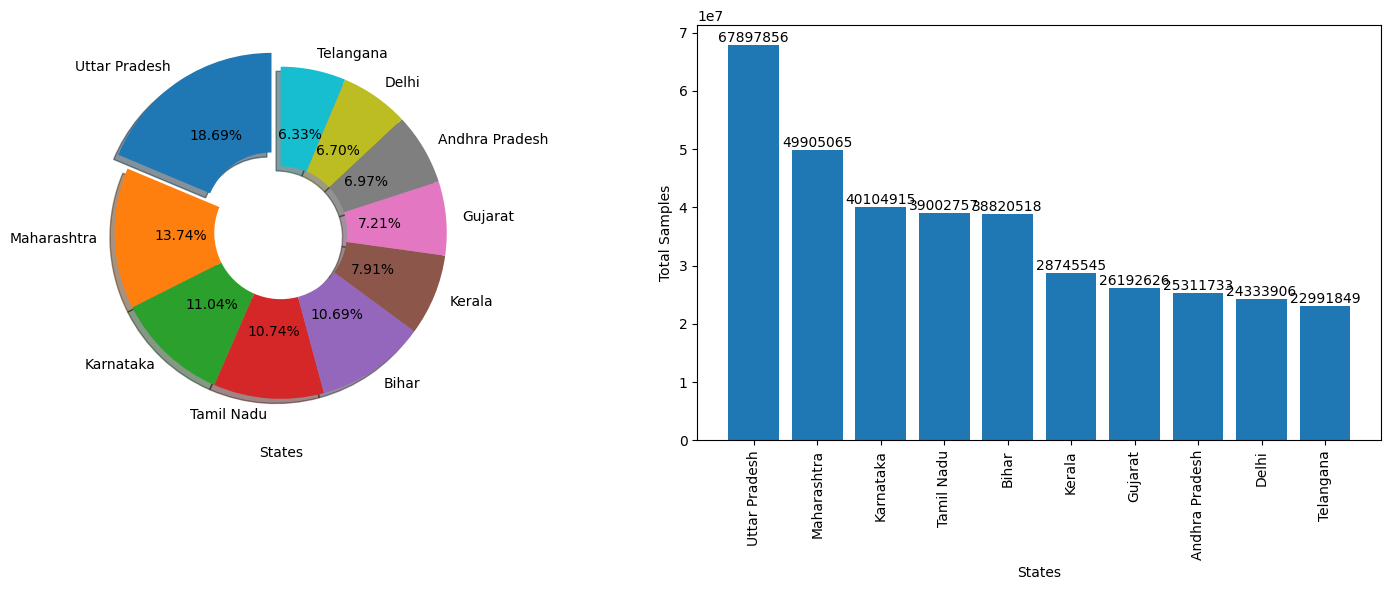

In [25]:
# Top 10 States having Positive Cases.

# Preparing data for the charts.
data = top_records_sorted(data_frame = df_group, field = nameof(df_group.Positive))

# 1. Positive.
plot_charts(x_data = data.State,
            y_data = data.Positive,
            x_label = 'States',
            y_label = 'Positive Cases',
            pie_labels = data.State,
            title = 'Positive Cases for each State')

# Preparing data for the charts.
data = top_records_sorted(data_frame = df_group, field = nameof(df_group.Negative))

# 2. Negative.
plot_charts(x_data = data.State,
            y_data = data.Negative,
            x_label = 'States',
            y_label = 'Negative Cases',
            pie_labels = data.State,
            title = 'Negative Cases for each State')

# Preparing data for the charts.
data = data = top_records_sorted(data_frame = df_group, field = nameof(df_group.TotalSamples))

# 3. Total Cases.
plot_charts(x_data = data.State,
            y_data = data.TotalSamples,
            x_label = 'States',
            y_label = 'Total Samples',
            pie_labels = data.State,
            title = 'Total Samples for each State')

<font color = '#FFA500' size = '8%'>Correlation</font>

<ipython-input-26-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

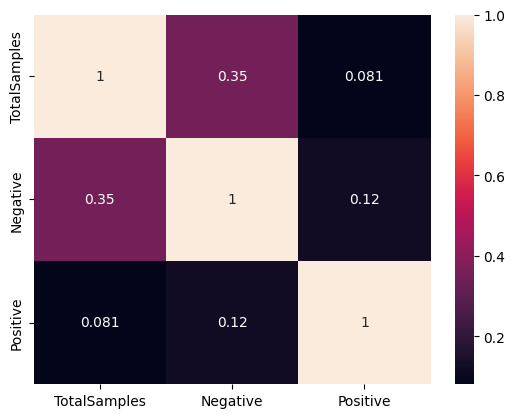

In [26]:
sns.heatmap(df.corr(), annot = True)

<center><font color = '#FFA500' size = '8%'>Modeling</font></center>

In [27]:
# Train-Test Split.
from sklearn.model_selection import train_test_split

# Machine Learning Models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Scores & Metrics.
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score

In [28]:
!pip install keras_tuner

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras import layers

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# import category_encoders as ce
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Flatten

import os
import matplotlib.cm as cm
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import classification_report

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import itertools

In [30]:
#region Conversion Methods

def extract_dates(series) -> tuple:
  '''
  Extracts dates from a given series instance.
  ---
  # Parameters:
  - series (pandas.Series): A series of dates to be converted for modeling.
  ---
  # Returns:
  - tuple
    - year (Series): Year in date.
    - month (Series): Month in date.
    - day (Series): Day in date.
  '''

  # Year, Month, Day.
  return series.dt.year, series.dt.month, series.dt.day

#endregion

#region Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, classes_x, classes_y, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues) -> None:
    '''
    Plot a confusion matrix.
    ---
    # Parameters:
    - y_true (array-like): True labels of the data.
    - y_pred (array-like): Predicted labels of the data.
    - classes_x (list): List of class labels on x axis.
    - classes_y (list): List of class labels on y axis.
    - normalize (bool, optional): If True, normalize the confusion matrix. Default is False.
    - title (str, optional): Title of the plot. Default is 'Confusion Matrix'.
    - cmap (matplotlib colormap, optional): Colormap to be used for the plot. Default is plt.cm.Blues.
    ---
    # Returns:
    - None: Displays the confusion matrix plot.
    ---
    Example:
    >>> y_true = [1, 0, 1, 2, 0, 1, 2, 2, 0]
    >>> y_pred = [1, 0, 2, 2, 0, 1, 2, 1, 0]
    >>> classes = ['Class 0', 'Class 1', 'Class 2']
    >>> plot_confusion_matrix(y_true, y_pred, classes, normalize=True, title='Normalized Confusion Matrix')
    '''

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[ : , np.newaxis]
        title = 'Normalized ' + title

    plt.figure(figsize = (6, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title = title
    plt.colorbar()

    plt.xticks(np.arange(len(classes_x)), classes_x, rotation = 45)
    plt.yticks(np.arange(len(classes_x)), classes_y)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

#endregion

#region Metrics

#region Classification Metrics

def calculate_auc(y_true, y_pred_prob) -> float:
  '''
  Calculate the Area Under the Curve (AUC) for a binary classification model.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred_prob (array-like): Predicted probabilities of the positive class.
  ---
  # Returns:
  float: AUC score.
  '''

  return roc_auc_score(y_true, y_pred_prob)

def calculate_precision(y_true, y_pred) -> float:
  '''
  Calculate Precision for a classification model.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred (array-like): Predicted binary labels.
  ---
  # Returns:
  float: Precision score.
  '''

  return precision_score(y_true, y_pred)

def calculate_recall(y_true, y_pred) -> float:
  '''
  Calculate Recall for a classification model.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred (array-like): Predicted binary labels.
  ---
  # Returns:
  float: Recall score.
  '''

  return recall_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred) -> float:
  '''
  Calculate F1 Score for a classification model.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred (array-like): Predicted binary labels.
  ---
  # Returns:
  float: F1 Score.
  '''

  return f1_score(y_true, y_pred)

def calculate_accuracy(y_true, y_pred) -> float:
  '''
  Calculate Accuracy for a classification model.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred (array-like): Predicted binary labels.
  ---
  # Returns:
  float: Accuracy score.
  '''

  return accuracy_score(y_true, y_pred)

#endregion

#region Regression Metrics

def calculate_rmse(y_true, y_pred) -> float:
  '''
  Calculate Root Mean Squared Error (RMSE) for a regression model.
  ---
  # Parameters:
  - y_true (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  ---
  # Returns:
  float: RMSE.
  '''

  mse = mean_squared_error(y_true, y_pred)
  return np.sqrt(mse)

def calculate_mae(y_true, y_pred) -> float:
  '''
  Calculate Mean Absolute Error (MAE) for a regression model.
  ---
  # Parameters:
  - y_true (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  ---
  # Returns:
  float: MAE.
  '''

  return mean_absolute_error(y_true, y_pred)

def calculate_mse(y_true, y_pred) -> float:
  '''
  Calculate Mean Squared Error (MSE) for a regression model.
  ---
  # Parameters:
  - y_true (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  ---
  # Returns:
  float: MSE.
  '''

  return mean_squared_error(y_true, y_pred)

def calculate_r2(y, y_pred) -> float:
  '''
  Calculate  R-Squared for a regression model.
  ---
  # Parameters:
  - X (array-like): Input features.
  - y (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  ---
  # Returns:
  float: R-Squared.
  '''

  return r2_score(y, y_pred)

def calculate_adjusted_r2(X, y, y_pred) -> float:
  '''
  Calculate Adjusted R-Squared for a regression model.
  ---
  # Parameters:
  - X (array-like): Input features.
  - y (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  ---
  # Returns:
  float: Adjusted R-Squared.
  '''

  n = X.shape[0] # n = Row-Size
  p = X.shape[1] # p = Column-Size

  r2 = r2_score(y, y_pred)
  adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

  return adjusted_r2

#endregion

#region Classification and Regression Metrics

# Classification Metrics.
def print_classification_metrics(y_true, y_pred, y_pred_prob = None) -> None:
  '''
  Print various classification evaluation metrics.
  ---
  # Parameters:
  - y_true (array-like): True binary labels.
  - y_pred (array-like): Predicted binary labels.
  - y_pred_prob (array-like): Predicted probabilities of the positive class. Default None.
  ---
  # Returns:
  None: Simply prints all of the scores.
  ---
  # Example:
  Assuming y_true and y_pred are your true and predicted labels and y_pred_prob is your predicted probabilities for binary classification.
  `print_classification_metrics(y_true, y_pred, y_pred_prob)`
  '''

  # print(f'Precision: { precision_score(y_true, y_pred) }')
  # print(f'Recall: { recall_score(y_true, y_pred) }')
  # print(f'F1 Score: { f1_score(y_true, y_pred) }')
  print(f'Accuracy: { accuracy_score(y_true, y_pred) }')

  if y_pred_prob != None:
    print(f'AUC Score: { roc_auc_score(y_true, y_pred_prob) }')

# Regression Metrics.
def print_regression_metrics(y_true, y_pred, X = None) -> None:
  '''
  Print various regression evaluation metrics.
  ---
  # Parameters:
  - y_true (array-like): True regression labels.
  - y_pred (array-like): Predicted regression labels.
  - X (array-like, optional): Input features for calculating adjusted R-Squared. Default: None.
  ---
  # Returns:
  None: Simply prints all of the scores.
  ---
  # Example:
  Assuming y_true and y_pred are your true and predicted labels, and X is your input features for regression (use None if not applicable).
  `print_regression_metrics(y_true, y_pred, X)`
  '''

  print(f'RMSE: { calculate_rmse(y_true, y_pred) }')
  print(f'MAE: { calculate_mae(y_true, y_pred) }')
  print(f'MSE: { calculate_mse(y_true, y_pred) }')
  print(f'R-Squared: { calculate_r2(y_true, y_pred) }')

  if X is not None:
      print(f'Adjusted R-Squared: { calculate_adjusted_r2(X, y_true, y_pred) }')

#endregion

#endregion

<font color = '#FFA500' size = '6%'>Data Preparation for Modeling</font>

In [31]:
# Adding `Year`, `Month`, and `Day` as a field by breaking the column `Date`.
df['Year'], df['Month'], df['Day'] = extract_dates(df.Date)

# Removing the obsolete field.
df.drop(['Date'], axis = 1, inplace = True)

# Displaying records for confirmation.
df

,State,TotalSamples,Negative,Positive,Year,Month,Day
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,2020,4,17
1,Andaman and Nicobar Islands,2679.0,508.0,27.0,2020,4,24
2,Andaman and Nicobar Islands,2848.0,20702.0,33.0,2020,4,27
3,Andaman and Nicobar Islands,3754.0,79091.0,33.0,2020,5,1
4,Andaman and Nicobar Islands,6677.0,10990.0,33.0,2020,5,16
...,...,...,...,...,...,...,...
16331,West Bengal,15999961.0,1309163.0,79774.0,2021,8,6
16332,West Bengal,16045662.0,6123965.0,79945.0,2021,8,7
16333,West Bengal,16092192.0,818014.0,80131.0,2021,8,8
16334,West Bengal,16122345.0,23264163.0,80208.0,2021,8,9


In [32]:
# Preparing Data.
# X = df.drop([nameof(df.State), nameof(df.Positive)], axis = 1)
X = df.drop([nameof(df.State), nameof(df.Positive), nameof(df.Negative), nameof(df.TotalSamples)], axis = 1)
y = df.Positive

<font color = '#FFA500' size = '4%'>Train and Test Split</font>

In [33]:
# Train-Test-Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<font color = '#FFA500' size = '6%'>Logistic Regression</font>

In [34]:
# Applying Model and Fitting the Training Data.
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Predicting the test values.
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([715343.,      0.,  80131., ..., 105781.,   5039.,   5039.])

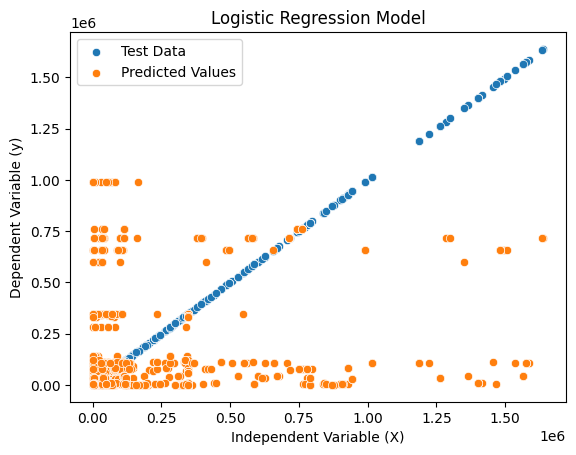

In [65]:
# Plotting the predictions.

# Helping variables.
x = y_test[ : len(X_test)].values
data = pd.DataFrame({ 'X' : x, 'Test' : y_test, 'Prediction' : y_pred_lr})

# Plotting the charts.
sns.scatterplot(data = data, x = 'X', y = 'Test', label = 'Test Data')
ax = sns.scatterplot(data = data, x = 'X', y = 'Prediction', label = 'Predicted Values')

# Chart Decoration.
ax.set_title('Logistic Regression Model')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()

# Plotting the graph.
plt.show()

In [37]:
# Model Accuracy Score.
accuracy_score(y_test, y_pred_lr)

0.01395690499510284

In [38]:
# Model Performance Metrics.
print_regression_metrics(y_true = y_test, y_pred = y_pred_lr, X = X_test)
print()
print_classification_metrics(y_true = y_test, y_pred = y_pred_lr)

RMSE: 290502.9806835364
MAE: 150183.06317335946
MSE: 84391981786.0191
R-Squared: -0.48285184420813
Adjusted R-Squared: -0.4839421764465184

Accuracy: 0.01395690499510284


In [63]:
# Confusion Matrix.
plot_confusion_matrix(y_true = y_test,
                      y_pred = y_pred_lr,
                      classes_x = ['True',
                                   'False'],
                      classes_y = ['Positive',
                                   'Negative'],
                      title = 'Logistic Regression - Confusion Matrix')

<font color = '#FFA500' size = '6%'>Random Forest Classifier</font>

In [40]:
# Applying Model and Fitting the Training Data.
# model_rf = RandomForestClassifier(random_state = 0)
# model_rf.fit(X_train, y_train)

In [41]:
# Predicting using Random Forest Classifier Algorithm.
# y_pred_rf = model_rf.predict(X_test)
# y_pred_rf

In [42]:
# Model Accuracy Score.
# accuracy_score(y_test, y_pred_rf)

<font color = '#FFA500' size = '6%'>Neural Network</font>

In [43]:
INPUT_NEURONS = X_train.shape[1]
OUTPUT_NEURONS = 1

MAX_LAYER = 8
ITER = 10
P_MAX = 20
BATCH_SIZE = 128
EPOCH = 20
NODE_CHANGE = 1

UPPER_LIMIT = INPUT_NEURONS + OUTPUT_NEURONS
LOWER_LIMIT = 0

PROPABILITY = 0.5

In [44]:
# Pipelining various scalers - Standard and MinMax.
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

# Splitting data for Neural Networking.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0) # 75-25 split.

# Transforming the data for scaling using mean and standard daviation.
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [45]:
# Parameters for the model.
batch_size = 128
num_classes = 1
epochs = 20

# Creating a sequential model here.
model = Sequential()

# Adding densily layers to the model.
model.add(Dense(512, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu', kernel_regularizer = keras.regularizers.l1(0.01)))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation = 'sigmoid'))

# Displaying the summary of the layers.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

In [46]:
%%time

# Evaluating the model based on its mean-square-error.
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Applying Early Stopping with Patience Level as 5.
es = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5)

# Reducing Learning Rate with a factor of 0.5 when exceeding the patience of 3.
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.5, patience = 3, verbose = 1)

# Model Training.
history = model.fit(X_train,
                    Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = 0.25,
                    callbacks = [es, reduce_lr])

Epoch 1/20
72/72 [==============================] - 3s 14ms/step - loss: 62080139264.0000 - accuracy: 0.0054 - val_loss: 69300723712.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - 1s 10ms/step - loss: 62080147456.0000 - accuracy: 0.0056 - val_loss: 69300723712.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - 1s 10ms/step - loss: 62080122880.0000 - accuracy: 0.0056 - val_loss: 69300723712.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 4/20
72/72 [==============================] - 1s 11ms/step - loss: 62080122880.0000 - accuracy: 0.0056 - val_loss: 69300723712.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 5/20
72/72 [==============================] - 1s 12ms/step - loss: 62080131072.0000 - accuracy: 0.0056 - val_loss: 69300723712.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 6/20
70/72 [============================>.] - ETA: 0s - loss: 62209183744.0000 - accuracy: 0.0055
Epoch 6: ReduceLROnPlateau

In [47]:
# Adding various densily connected layers for our neural network model.
model.add(Dense(512, activation='relu', input_shape = X_train.shape[1 : ]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu', kernel_regularizer = keras.regularizers.l1(0.01)))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation='sigmoid'))

# Displaying the summary of the network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

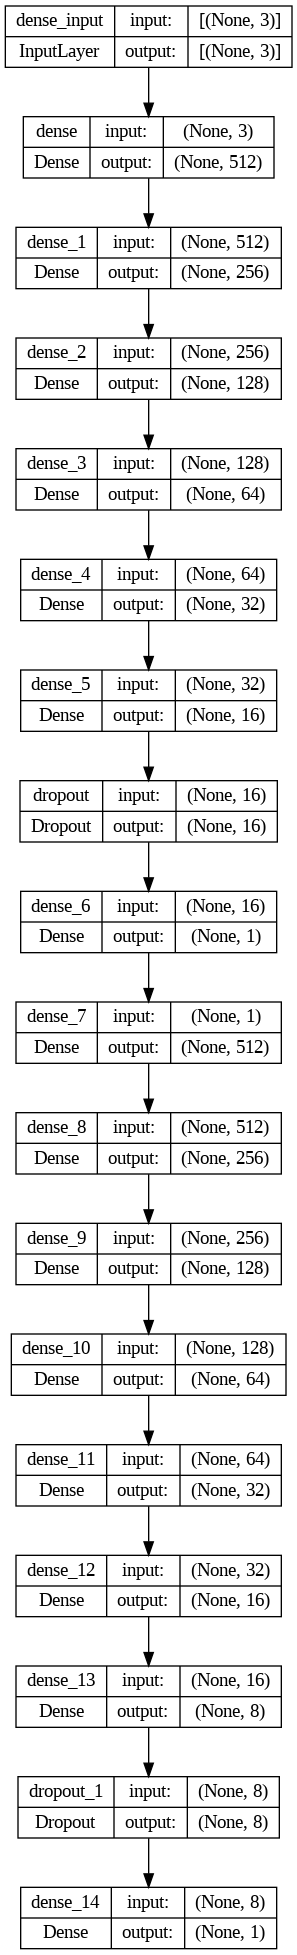

In [48]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [49]:
%%time

# Evaluating the model based on its mean-square-error.
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

# Defining early stop with the patience level of 5.
es = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5)

# Defining reduction of learning rate by the factor of half after crossing the limit of patience, i.e. 3.
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.5, patience = 3, verbose = 1)

# Model Training.
history = model.fit(X_train,
                    Y_train,
                    batch_size = 256,
                    epochs = 150,
                    validation_split = 0.25,
                    callbacks = [es, reduce_lr])

Epoch 1/150
36/36 [==============================] - 4s 30ms/step - loss: 62080184320.0000 - accuracy: 0.0056 - val_loss: 69300731904.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 2/150
36/36 [==============================] - 1s 26ms/step - loss: 62080139264.0000 - accuracy: 0.0056 - val_loss: 69300731904.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 3/150
36/36 [==============================] - 1s 26ms/step - loss: 62080131072.0000 - accuracy: 0.0056 - val_loss: 69300731904.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 4/150
36/36 [==============================] - 1s 24ms/step - loss: 62080131072.0000 - accuracy: 0.0056 - val_loss: 69300731904.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 5/150
36/36 [==============================] - 1s 33ms/step - loss: 62080131072.0000 - accuracy: 0.0056 - val_loss: 69300731904.0000 - val_accuracy: 0.0062 - lr: 0.0010
Epoch 6/150
35/36 [============================>.] - ETA: 0s - loss: 62138589184.0000 - accuracy: 0.0054
Epoch 6: ReduceLROnP

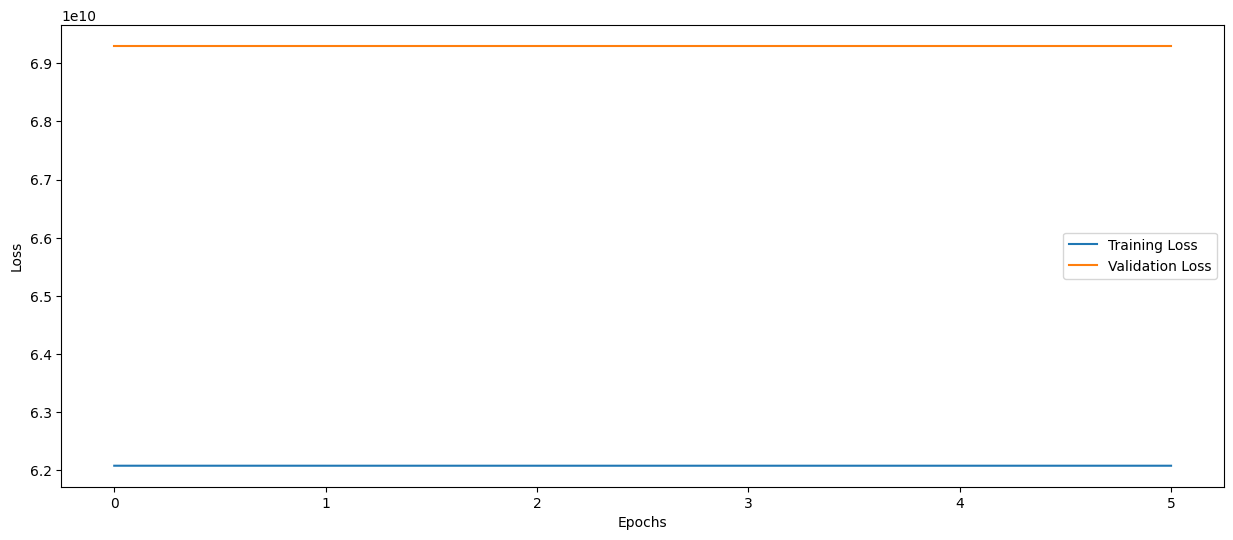

CPU times: user 304 ms, sys: 113 ms, total: 417 ms
Wall time: 4.09 s


In [50]:
%%time

#

plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title = 'Training and Validation Loss'
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
# Predicting values based on Test Data.
y_pred_nn = model.predict(X_test)

128/128 [==============================] - 1s 3ms/step


In [52]:
# Displaying various metrics for understand how well the model scored.
print_regression_metrics(X = X, y_pred = y_pred_nn, y_true = y_test)

RMSE: 266179.0528107333
MAE: 118065.00612144957
MSE: 70851288155.21915
R-Squared: -0.2449282631124745
Adjusted R-Squared: -0.24515694207336947


In [64]:
# Confusion Matrix.
plot_confusion_matrix(y_true = y_test,
                      y_pred = y_pred_nn,
                      classes_x = ['True',
                                   'False'],
                      classes_y = ['Positive',
                                   'Negative'],
                      title = 'ANN - Confusion Matrix')

<center><font color = '#FFA500' size = '6%'>Implementing Pipeline for Various Classification Models</center></font>

In [54]:
# Implementing pipelines for all of the classification models.

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state = 0))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT', DecisionTreeClassifier(random_state = 0))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF', RandomForestClassifier(random_state = 0))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [55]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

lr_param_grid = [{'LR__penalty' : ['l1', 'l2'],
                  'LR__C' : param_range_fl,
                  'LR__solver' : ['liblinear'] }]

dt_param_grid = [{'DT__criterion' : ['gini', 'entropy'],
                  'DT__min_samples_leaf' : param_range,
                  'DT__max_depth' : param_range,
                  'DT__min_samples_split' : param_range[1 : ] }]

rf_param_grid = [{'RF__min_samples_leaf' : param_range,
                  'RF__max_depth' : param_range,
                  'RF__min_samples_split' : param_range[1 : ] }]

knn_param_grid = [{'KNN__n_neighbors' : param_range,
                   'KNN__weights' : ['uniform', 'distance'],
                   'KNN__metric' : ['euclidean', 'manhattan'] }]

In [56]:
# Grid Search for all models.

lr_grid_search = GridSearchCV(estimator = pipe_lr,
                              param_grid = lr_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

dt_grid_search = GridSearchCV(estimator = pipe_dt,
                              param_grid = dt_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

rf_grid_search = GridSearchCV(estimator = pipe_rf,
                              param_grid = rf_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

knn_grid_search = GridSearchCV(estimator = pipe_knn,
                               param_grid = knn_param_grid,
                               scoring = 'accuracy',
                               cv = 3)

In [57]:
# Model Fitting.

%%time

grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]

for pipe in grids:
    pipe.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


CPU times: user 54min, sys: 20min 48s, total: 1h 14min 49s
Wall time: 1h 15min 23s


In [58]:
# Predictions.

%%time

y_preds = []

for pipe in grids:
  y_preds.append(pipe.predict(X_train))

CPU times: user 19.5 s, sys: 8.97 s, total: 28.5 s
Wall time: 28.4 s


In [ ]:
# Probabilities.

%%time

y_probs = []

for pipe in grids:
  y_probs.append(pipe.predict_proba(X_train))

<font color = '#FFA500' size = '4%'>Final Metrics/Scores</font>

In [60]:
# Models.
grid_dict = {
    0 : 'Logistic Regression',
    1 : 'Decision Trees',
    2 : 'Random Forest',
    3 : 'XGBoost'
}

In [ ]:
# Metrics and Scores.

for iteration in range(len(grids)):

  #region Print Decoration

  model_text = 'Model: ' + grid_dict[iteration]
  print('-' * (len(model_text)))
  print(model_text)
  print('-' * (len(model_text)))

  #endregion

  # Displaying the Metrics.
  print_regression_metrics(Y_train, y_preds[iteration], X_test)

  iteration += 1

In [62]:
%%time

# Displaying accuracy and best parameters used for the model.
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test, Y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.10945151811949069
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.09720861900097943
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.46057786483839375
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2}
XGBoost Test Accuracy: 0.6755631733594515
XGBoost Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
CPU times: user 6.32 s, sys: 2.76 s, total: 9.08 s
Wall time: 9 s


<center><font color = '#FFA500' size = '8%'>Confusion Matrix</font></center>

In [ ]:
plot_confusion_matrix(y_true = y_test,
                      y_pred = y_pred_lr,
                      classes_x = ['True',
                                   'False'],
                      classes_y = ['Positive',
                                   'Negative'],
                      title = 'Logistic Regression - Confusion Matrix')

<center><font color = '#FFA500' size = '8%'>References</font></center>
<ul>
  <li>https://www.worldometers.info/coronavirus/</li>
  <li>https://github.com/CSSEGISandData/COVID-19</li>
  <li>https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning</li>
  <li>https://www.niaid.nih.gov/news-events/novel-coronavirus-sarscov2-images</li>
  <li>https://blogs.cdc.gov/publichealthmatters/2019/04/h1n1/</li>
  <li>https://www.kaggle.com/imdevskp/corona-virus-report</li>
  <li>https://www.kaggle.com/imdevskp/mers-outbreak-dataset-20122019</li>
  <li>https://www.kaggle.com/imdevskp/ebola-outbreak-20142016-complete-dataset</li>
  <li>https://www.kaggle.com/imdevskp/h1n1-swine-flu-2009-pandemic-dataset</li>
  <li>https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset</li>
  <li>https://www.kaggle.com/imdevskp/hiv-aids-dataset</li>
  <li>https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6</li>
  <li>https://www.worldometers.info/coronavirus/</li>
  <li>https://app.flourish.studio/visualisation/1571387</li>
</ul>